<a href="https://colab.research.google.com/github/NeginKhalifat/TensorFlow_PracticeNotes/blob/main/10_Tranfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning


1.   Use data augmentation with ImageDatagenerator
2.   precompute "Body" without data augmentation



In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import sys,os
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam

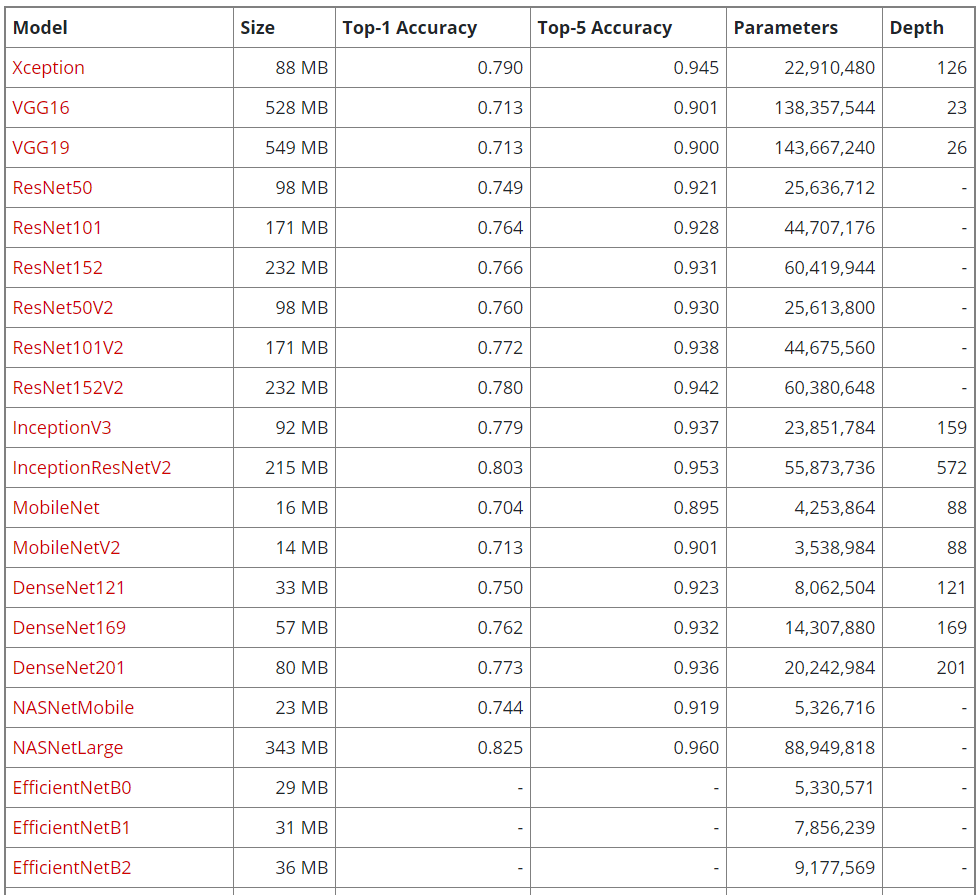

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/food41

Saving kaggle.json to kaggle.json
100% 5.29G/5.30G [01:15<00:00, 65.3MB/s]
100% 5.30G/5.30G [01:15<00:00, 75.7MB/s]


In [3]:
! mkdir train
! unzip food41.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/images/tacos/1026681.jpg  
  inflating: train/images/tacos/1030289.jpg  
  inflating: train/images/tacos/1033196.jpg  
  inflating: train/images/tacos/1036030.jpg  
  inflating: train/images/tacos/1042175.jpg  
  inflating: train/images/tacos/1044043.jpg  
  inflating: train/images/tacos/1058697.jpg  
  inflating: train/images/tacos/1059239.jpg  
  inflating: train/images/tacos/1059326.jpg  
  inflating: train/images/tacos/1066762.jpg  
  inflating: train/images/tacos/1070967.jpg  
  inflating: train/images/tacos/1073468.jpg  
  inflating: train/images/tacos/1075296.jpg  
  inflating: train/images/tacos/1085243.jpg  
  inflating: train/images/tacos/108529.jpg  
  inflating: train/images/tacos/1086014.jpg  
  inflating: train/images/tacos/108945.jpg  
  inflating: train/images/tacos/1089575.jpg  
  inflating: train/images/tacos/1091159.jpg  
  inflating: train/images/tacos/1101369.jpg  
  inflating: train/images/tacos

In [4]:
!mkdir train/test

In [5]:
IMAGE_SIZE=[200,200]
from glob import glob
import shutil
folders = glob("/content/train/images"+'/*')
k = len(folders)
all_cat={}
for i in folders:
  #print([i.split('/')[-1])
  
  all_files = glob("/content/train/images"+'/'+i.split('/')[-1]+'/*.jpg')
  all_cat['test_file']= all_files[-200:-1]
  print(len(all_files))
  test_path ="/content/train/test"+"/"+i.split('/')[-1]
  if not os.path.exists(test_path):
    os.mkdir(test_path, mode = 0o777, dir_fd = None)
    for j in all_cat['test_file']:
      shutil.move(j, test_path)
  
  all_files = glob("/content/train/images"+'/'+i.split('/')[-1]+'/*.jpg')
  all_cat[i.split('/')[-1]]=len(all_files)
  
print(all_cat)

#pre_train_model =VGG16(input_shape=)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
{'test_file': ['/content/train/images/huevos_rancheros/917566.jpg', '/content/train/images/huevos_rancheros/1696753.jpg', '/content/train/images/huevos_rancheros/817288.jpg', '/content/train/images/huevos_rancheros/939545.jpg', '/content/train/images/huevos_rancheros/1317875.jpg', '/content/train/images/huevos_rancheros/2435081.jpg', '/content/train/images/huevos_rancheros/1448656.jpg', '/content/train/images/huevos_rancheros/656935.jpg', '/content/train/images/huevos_rancheros/3699690.jpg'

In [6]:
pre_train_model = VGG16(
    input_shape= IMAGE_SIZE+[3],
    weights = 'imagenet',
    classes=1000,
    include_top = False
)

58892288/58889256 [==============================] - 0s 0us/step


In [7]:
pre_train_model.trainable = False  #freeze

create model

In [8]:
from tensorflow.keras.models import Model
x = Flatten()(pre_train_model.output)
x = Dense(k,activation='softmax')(x)
model = Model(inputs=pre_train_model.input,outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [9]:
from keras.applications.vgg16 import preprocess_input

gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1, shear_range=0.1,zoom_range=0.2,horizontal_flip=True,preprocessing_function=preprocess_input
                    )


In [10]:
batch_size = 128
train_gen = gen.flow_from_directory(
    "/content/train/images",shuffle =True,
    target_size = IMAGE_SIZE,
    batch_size =batch_size
)

Found 80901 images belonging to 101 classes.


In [11]:
valid_gen = gen.flow_from_directory(
    "/content/train/test",shuffle =True,
    target_size = IMAGE_SIZE,
    batch_size =batch_size
)

Found 20099 images belonging to 101 classes.


In [ ]:
import numpy as np
image_file = glob("/content/train/images"+'/*/*.jpg')
valid_image=glob("/content/train/test"+'/*/*.jpg')
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
r = model.fit(
    train_gen,validation_data =valid_gen,steps_per_epoch =int(np.ceil( len(image_file)/batch_size)),
    validation_steps = int(np.ceil( len(valid_image)/batch_size))
)

477/633 [=====================>........] - ETA: 2:07:55 - loss: 32.0320 - accuracy: 0.3461